# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict the monthly sales of a particular store. The data that we have ranges from 2013 to 2017.

## Read the data as a monthly Time Series from the '.csv' file.

Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

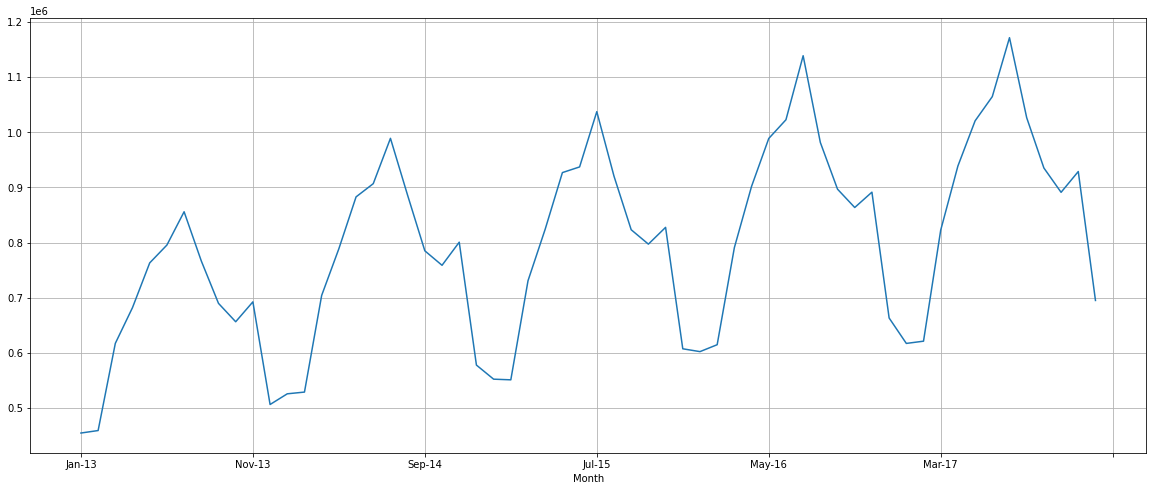

In [10]:
df.plot(figsize=(20,8))
plt.grid();

There seems to be a trend with a seasonality as well.

## Check the basic measures of descriptive statistics of the Time Series

In [12]:
round(df.describe(),3)

,Sales
count,60.000
mean,795075.200
std,172901.778
min,454904.000
25%,661705.000
50%,799018.000
75%,922026.250
max,1171393.000


## Plot a boxplot to understand the spread of sales across different years and withing different months across years.

### Yearly Boxplot

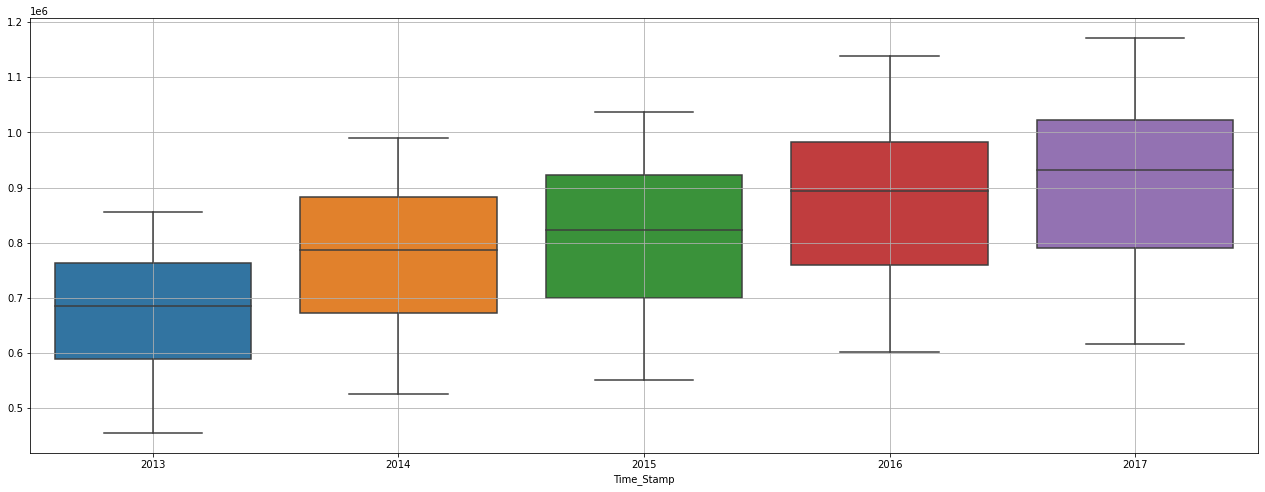

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

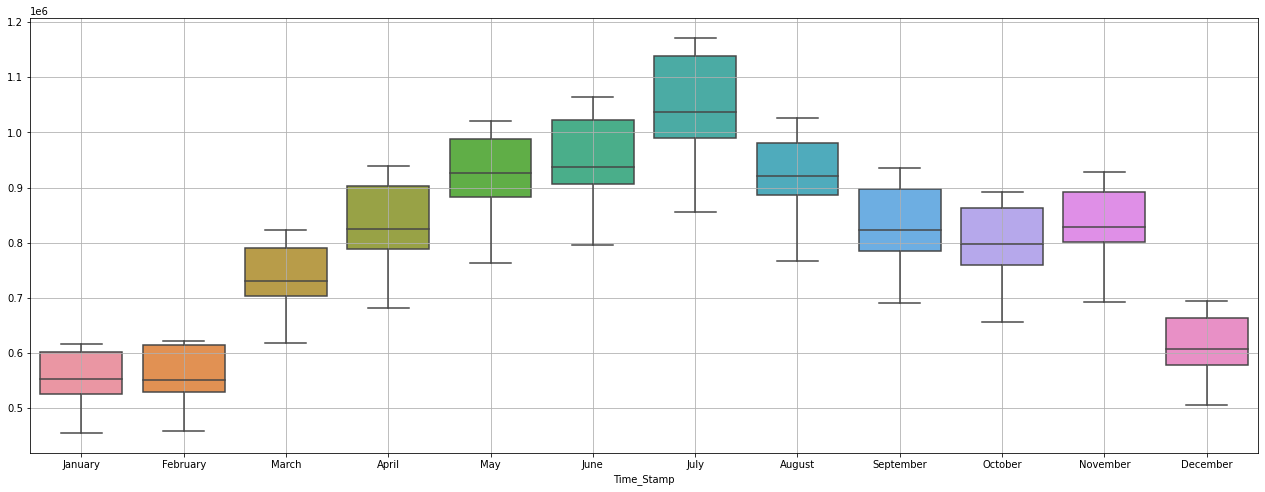

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

We see that there is maximum sales in the month of July.

## Plot a graph of monthly sales across years.

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2013,682274,766761,506607,459417,454904,855922,795597,617382,763242,692643,656587,689907
2014,788914,885596,578048,529117,525987,989010,906842,704301,882877,800783,758883,785124
2015,824467,920401,607572,551317,552513,1037350,937184,730951,926902,827645,797253,823332
2016,901950,981494,663411,614957,602439,1138718,1022664,790881,988730,891448,863637,896831
2017,938862,1026403,695170,621369,617306,1171393,1064624,822667,1020686,928837,891160,935263


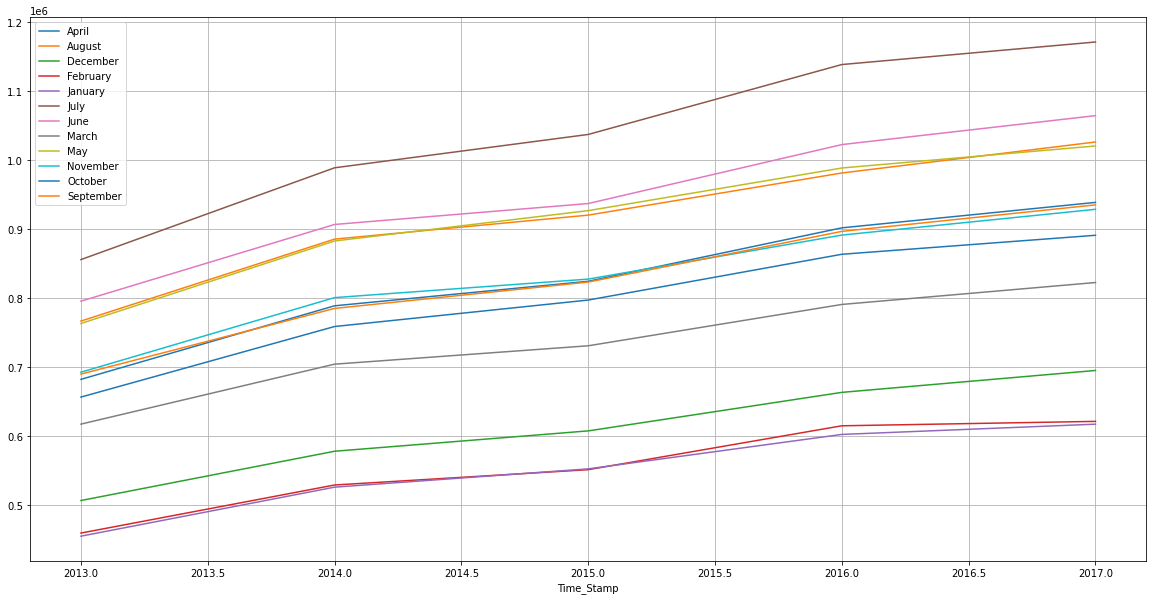

In [16]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that July has the highest sales across years.

## Decompose the Time Series

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

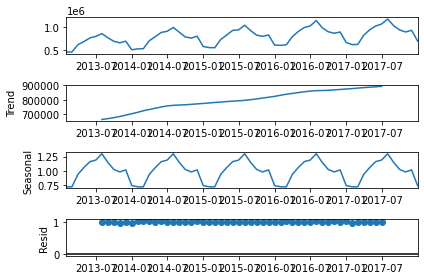

## Split the data into train and test and plot the training and test data.

In [ ]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

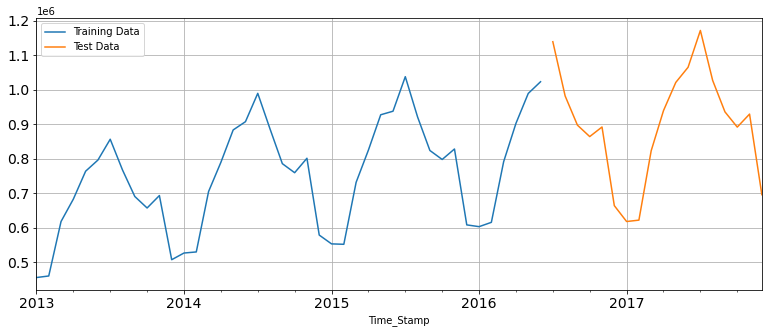

In [23]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

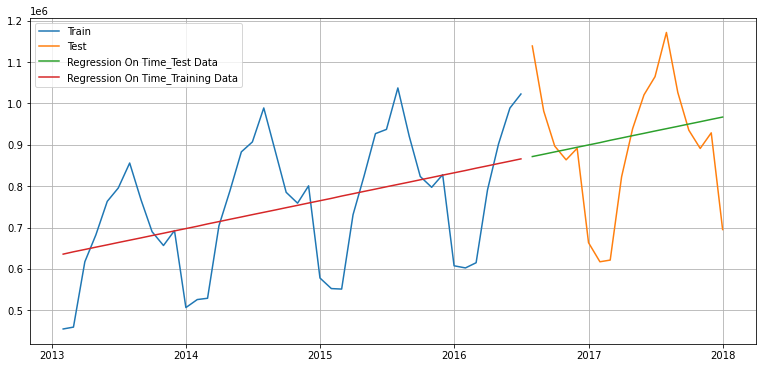

#### Defining the functions for calculating the accuracy metrics.

In [31]:
from sklearn import metrics

In [32]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

### Model Evaluation

In [33]:
## Training Data - RMSE and MAPE



For RegressionOnTime forecast on the Training Data,  RMSE is 140913.956 MAPE is 15.42


In [34]:
## Test Data - RMSE and MAPE



For RegressionOnTime forecast on the Test Data,  RMSE is 163404.817 MAPE is 13.97


,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

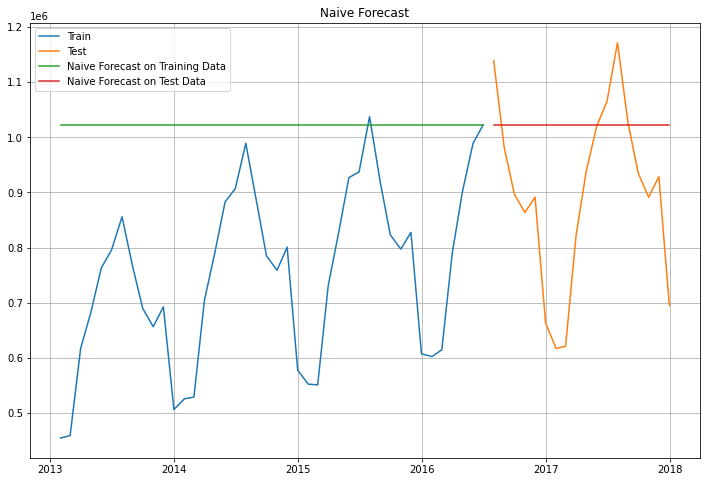

### Model Evaluation

In [40]:
## Training Data - RMSE and MAPE



For Naive Model forecast on the Training Data,  RMSE is 313648.937 MAPE is 36.30


In [41]:
## Test Data - RMSE and MAPE



For RegressionOnTime forecast on the Test Data,  RMSE is 202735.276 MAPE is 17.69


,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97
NaiveModel,202735.276206,17.69


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

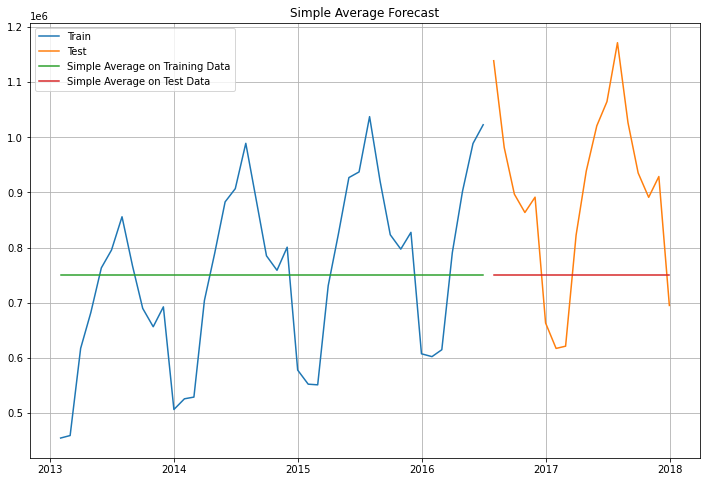

### Model Evaluation

In [47]:
## Training Data - RMSE and MAPE



For Simple Average Model forecast on the Training Data,  RMSE is 156482.459 MAPE is 17.49


In [48]:
## Test Data - RMSE and MAPE



For Simple Average forecast on the Test Data,  RMSE is 217661.009 MAPE is 21.44


,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97
NaiveModel,202735.276206,17.69
SimpleAverageModel,217661.008946,21.44


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

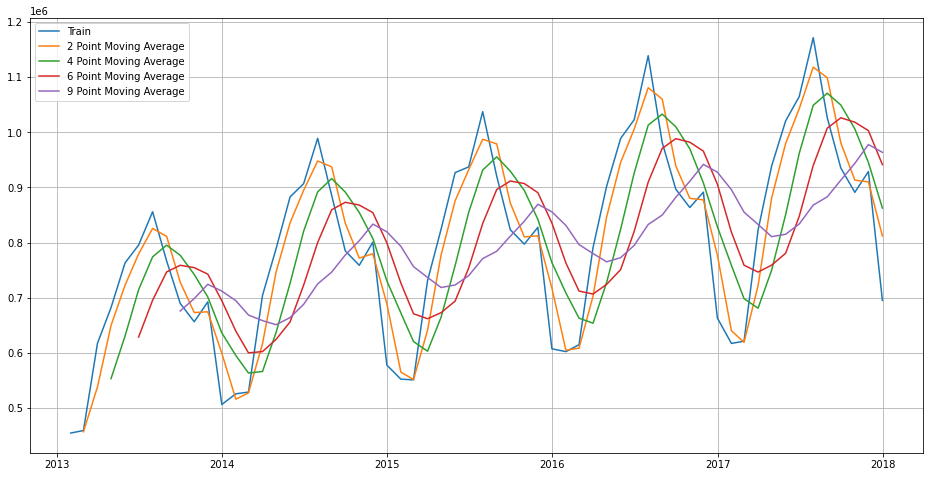

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

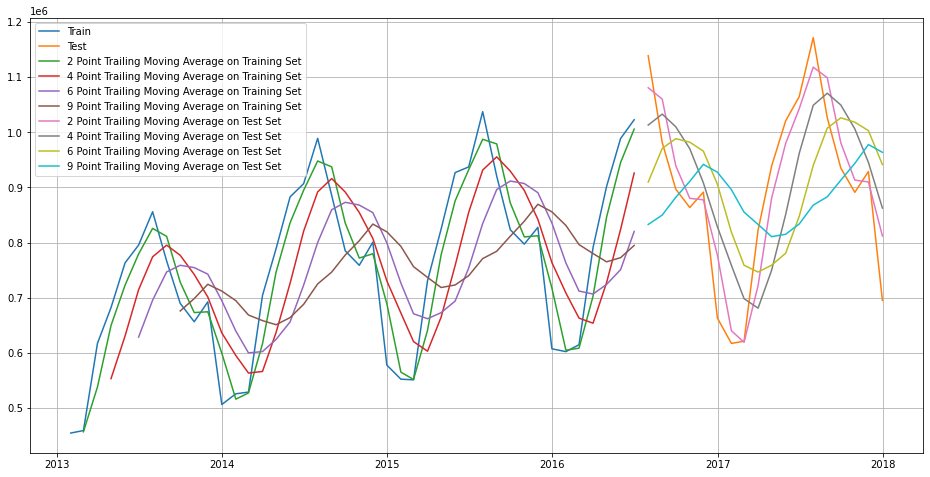

### Model Evaluation

##### Done only on the test data.

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 60405.468 MAPE is 5.56
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 120837.916 MAPE is 12.25
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 164346.870 MAPE is 16.13
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 185658.328 MAPE is 16.95


,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97
NaiveModel,202735.276206,17.69
SimpleAverageModel,217661.008946,21.44
2pointTrailingMovingAverage,60405.468033,5.56
4pointTrailingMovingAverage,120837.915548,12.25
6pointTrailingMovingAverage,164346.870263,16.13
9pointTrailingMovingAverage,185658.327563,16.95


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

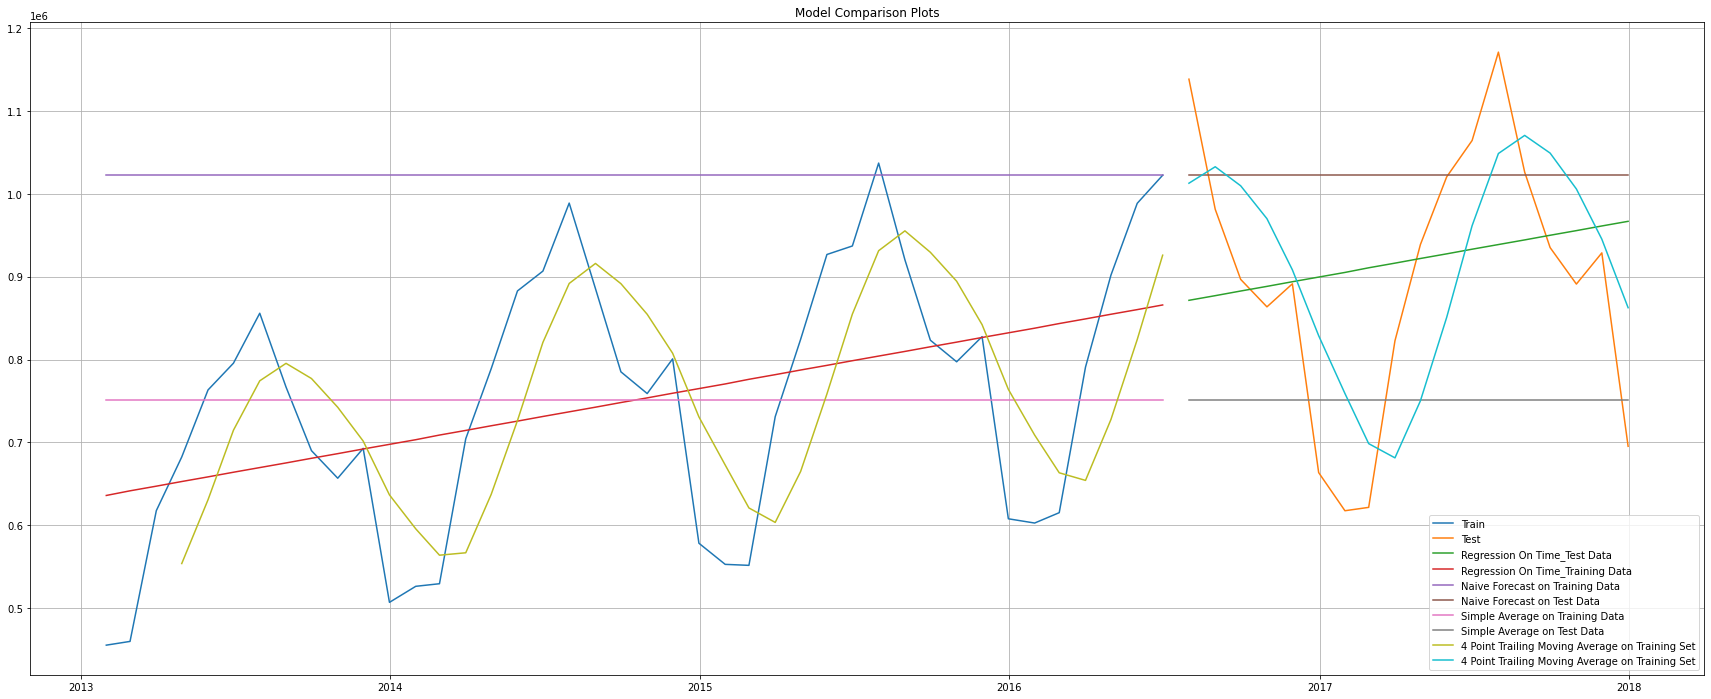

## Method 5: Simple Exponential Smoothing

In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

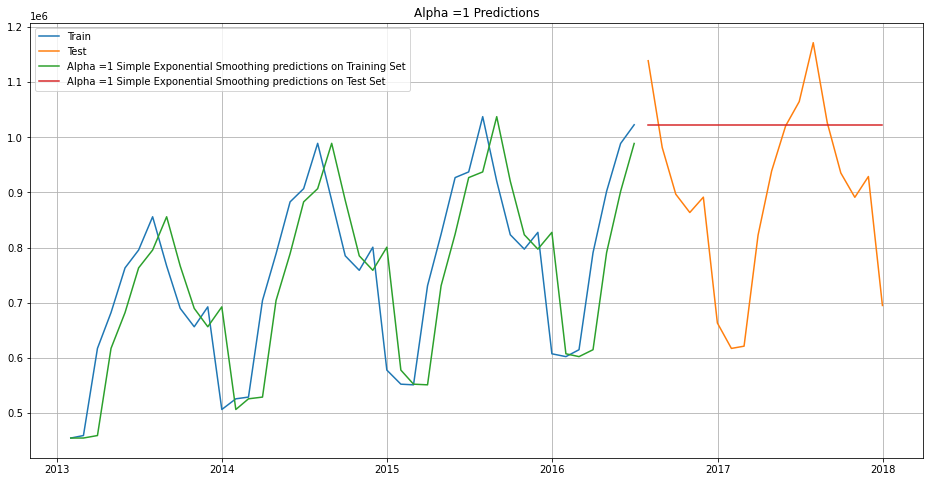

### Model Evaluation for $\alpha$ = 1 : Simple Exponential Smoothing

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 98333.790 MAPE is 10.24


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 202735.276 MAPE is 17.69


,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97
NaiveModel,202735.276206,17.69
SimpleAverageModel,217661.008946,21.44
2pointTrailingMovingAverage,60405.468033,5.56
4pointTrailingMovingAverage,120837.915548,12.25
6pointTrailingMovingAverage,164346.870263,16.13
9pointTrailingMovingAverage,185658.327563,16.95
"Alpha=1,SimpleExponentialSmoothing",202735.276206,17.69


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

## Model Evaluation

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

# END